In [1]:
lr = 2e-5 
epoch = int(2e3) 
batch_size = 100
layer_widths = [784, 600, 500, 400, 300, 200, 100, 50, 10, 2]

In [2]:
import numpy as np; np.random.seed(0)
import tensorflow.compat.v1 as tf; tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape((-1, 784)), x_test.reshape((-1, 784))
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)

(60000, 784) float32
(10000, 784) float32


In [4]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 784)) # (?, 784)

init_w = tf.keras.initializers.VarianceScaling(seed=0)
init_b = tf.keras.initializers.zeros()

w_shapes = []
previous = layer_widths[0] 
for layer_width in layer_widths[1:]:
    w_shapes.append((previous, layer_width))
    previous = layer_width 

for i, (pre, layer_width) in enumerate(w_shapes):
    w_name = f'w{i}_encoder'
    b_name = f'b{i}_encoder'
    w = tf.get_variable(w_name, (pre, layer_width), tf.float32, init_w)
    b = tf.get_variable(b_name, (layer_width,), tf.float32, init_b)
    if i==0:
        x1 = tf.nn.selu(x @ w + b)
    elif i!=len(w_shapes)-1:
        x1 = tf.nn.selu(x1 @ w + b)
    else:
        hidden = tf.nn.sigmoid(x1 @ w + b)
        
for i, (pre, layer_width) in enumerate(w_shapes[::-1]):
    w_name = f'w{len(w_shapes)-1-i}_decoder'
    b_name = f'b{len(w_shapes)-1-i}_decoder'
    w = tf.get_variable(w_name, (layer_width, pre), tf.float32, init_w)
    b = tf.get_variable(b_name, (pre,), tf.float32, init_b)
    if i==0:
        x1 = tf.nn.selu(hidden @ w + b)
    elif i!=len(w_shapes)-1:
        x1 = tf.nn.selu(x1 @ w + b)
    else:
        x_recon = tf.nn.sigmoid(x1 @ w + b)

loss = tf.keras.losses.binary_crossentropy(x, x_recon)

opt = tf.train.AdamOptimizer(lr)
train = opt.minimize(loss)

init = tf.global_variables_initializer()

In [5]:
with tf.Session() as sess:
    
    sess.run(init)
    
    loss_trace = []

    for i in range(epoch):
        
        idx = np.arange(x_train.shape[0])
        np.random.shuffle(idx)
        
        x_epoch = x_train[idx]
        
        for k in range(x_train.shape[0]//batch_size):
            
            if k==0:
                loss_temp = []
                
            x_batch = x_epoch[k*batch_size:(k+1)*batch_size]
            
            feed_dict = {x : x_batch}
            
            loss_run, _ = sess.run([loss, train], feed_dict=feed_dict)
            
            loss_temp.append(loss_run) 
        
        loss_avg = np.array(loss_temp).mean()
        loss_trace.append(loss_avg)
        print(f'{i+1}/{epoch} loss {loss_avg}')
    
    feed_dict = {x : x_test}
    x_test_recon, x_test_hidden = sess.run([x_recon, hidden], 
                                           feed_dict=feed_dict)
    
    x_grid = np.linspace(0.01, 0.99, 20)
    y_grid = np.linspace(0.01, 0.99, 20)
    X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
    X_grid, Y_grid = X_grid.reshape((-1,1)), Y_grid.reshape((-1,1))
    hidden_grid = np.concatenate([X_grid, Y_grid], axis=1)
    
    feed_dict = {hidden : hidden_grid}
    latent_space_walk = sess.run(x_recon, feed_dict=feed_dict)

1/2000 loss 0.2947370111942291
2/2000 loss 0.2345552146434784
3/2000 loss 0.22324062883853912
4/2000 loss 0.2171785533428192
5/2000 loss 0.21199923753738403
6/2000 loss 0.20731982588768005
7/2000 loss 0.20410268008708954
8/2000 loss 0.20177116990089417
9/2000 loss 0.19975575804710388
10/2000 loss 0.1978123039007187
11/2000 loss 0.1960524022579193
12/2000 loss 0.19454391300678253
13/2000 loss 0.19332315027713776
14/2000 loss 0.19189654290676117
15/2000 loss 0.19068646430969238
16/2000 loss 0.189663365483284
17/2000 loss 0.1887919008731842
18/2000 loss 0.1879763901233673
19/2000 loss 0.18727989494800568
20/2000 loss 0.18657904863357544
21/2000 loss 0.18605656921863556
22/2000 loss 0.185435950756073
23/2000 loss 0.18478888273239136
24/2000 loss 0.18427994847297668
25/2000 loss 0.18373098969459534
26/2000 loss 0.18324816226959229
27/2000 loss 0.18277664482593536
28/2000 loss 0.18234506249427795
29/2000 loss 0.18183638155460358
30/2000 loss 0.18144652247428894
31/2000 loss 0.181047663092613

248/2000 loss 0.1630866825580597
249/2000 loss 0.16289952397346497
250/2000 loss 0.16297796368598938
251/2000 loss 0.16289472579956055
252/2000 loss 0.16284359991550446
253/2000 loss 0.16293548047542572
254/2000 loss 0.1633128523826599
255/2000 loss 0.1627873331308365
256/2000 loss 0.1627282053232193
257/2000 loss 0.16270175576210022
258/2000 loss 0.16286800801753998
259/2000 loss 0.1626700460910797
260/2000 loss 0.16295406222343445
261/2000 loss 0.16283127665519714
262/2000 loss 0.1626177430152893
263/2000 loss 0.16259348392486572
264/2000 loss 0.162514328956604
265/2000 loss 0.16264404356479645
266/2000 loss 0.16236485540866852
267/2000 loss 0.16248375177383423
268/2000 loss 0.162517711520195
269/2000 loss 0.16242210566997528
270/2000 loss 0.16249771416187286
271/2000 loss 0.16281375288963318
272/2000 loss 0.16274505853652954
273/2000 loss 0.16220751404762268
274/2000 loss 0.1621214896440506
275/2000 loss 0.16231529414653778
276/2000 loss 0.1623307168483734
277/2000 loss 0.1621058285

491/2000 loss 0.15778452157974243
492/2000 loss 0.15784893929958344
493/2000 loss 0.15782342851161957
494/2000 loss 0.15777616202831268
495/2000 loss 0.15773335099220276
496/2000 loss 0.1577959507703781
497/2000 loss 0.15787732601165771
498/2000 loss 0.1578962504863739
499/2000 loss 0.1577485203742981
500/2000 loss 0.1577913761138916
501/2000 loss 0.15789827704429626
502/2000 loss 0.15772390365600586
503/2000 loss 0.1578463912010193
504/2000 loss 0.1577940136194229
505/2000 loss 0.1576356440782547
506/2000 loss 0.1577489674091339
507/2000 loss 0.15766207873821259
508/2000 loss 0.15750862658023834
509/2000 loss 0.15771478414535522
510/2000 loss 0.15754127502441406
511/2000 loss 0.15746913850307465
512/2000 loss 0.15742799639701843
513/2000 loss 0.15740293264389038
514/2000 loss 0.15751533210277557
515/2000 loss 0.15737254917621613
516/2000 loss 0.1573813110589981
517/2000 loss 0.15751752257347107
518/2000 loss 0.15735797584056854
519/2000 loss 0.1575048714876175
520/2000 loss 0.15729972

735/2000 loss 0.15462717413902283
736/2000 loss 0.1543511301279068
737/2000 loss 0.15440908074378967
738/2000 loss 0.154338538646698
739/2000 loss 0.15428271889686584
740/2000 loss 0.15455809235572815
741/2000 loss 0.15449774265289307
742/2000 loss 0.15453022718429565
743/2000 loss 0.1541430801153183
744/2000 loss 0.15422624349594116
745/2000 loss 0.15424509346485138
746/2000 loss 0.15416352450847626
747/2000 loss 0.15428298711776733
748/2000 loss 0.1544557362794876
749/2000 loss 0.1542152315378189
750/2000 loss 0.15419860184192657
751/2000 loss 0.15420430898666382
752/2000 loss 0.15404285490512848
753/2000 loss 0.1541573405265808
754/2000 loss 0.15411508083343506
755/2000 loss 0.15418538451194763
756/2000 loss 0.15400981903076172
757/2000 loss 0.15393415093421936
758/2000 loss 0.15411056578159332
759/2000 loss 0.15412044525146484
760/2000 loss 0.15433663129806519
761/2000 loss 0.15410515666007996
762/2000 loss 0.15399473905563354
763/2000 loss 0.1541297733783722
764/2000 loss 0.154144

979/2000 loss 0.15232811868190765
980/2000 loss 0.15166078507900238
981/2000 loss 0.15142077207565308
982/2000 loss 0.15173141658306122
983/2000 loss 0.15214356780052185
984/2000 loss 0.15155437588691711
985/2000 loss 0.15137776732444763
986/2000 loss 0.15143588185310364
987/2000 loss 0.15142033994197845
988/2000 loss 0.15149371325969696
989/2000 loss 0.15165062248706818
990/2000 loss 0.1512971967458725
991/2000 loss 0.15138158202171326
992/2000 loss 0.1515258103609085
993/2000 loss 0.1518033742904663
994/2000 loss 0.15145651996135712
995/2000 loss 0.15148049592971802
996/2000 loss 0.1512610912322998
997/2000 loss 0.15134668350219727
998/2000 loss 0.15141062438488007
999/2000 loss 0.1511867344379425
1000/2000 loss 0.1513769030570984
1001/2000 loss 0.15121808648109436
1002/2000 loss 0.15133804082870483
1003/2000 loss 0.15137788653373718
1004/2000 loss 0.1514691710472107
1005/2000 loss 0.15120290219783783
1006/2000 loss 0.15116912126541138
1007/2000 loss 0.1513034850358963
1008/2000 loss

1216/2000 loss 0.1493140310049057
1217/2000 loss 0.1492280662059784
1218/2000 loss 0.1492781937122345
1219/2000 loss 0.14943623542785645
1220/2000 loss 0.14919619262218475
1221/2000 loss 0.14923200011253357
1222/2000 loss 0.14947663247585297
1223/2000 loss 0.14928598701953888
1224/2000 loss 0.14916624128818512
1225/2000 loss 0.14912430942058563
1226/2000 loss 0.14933139085769653
1227/2000 loss 0.14907526969909668
1228/2000 loss 0.14943628013134003
1229/2000 loss 0.1491652876138687
1230/2000 loss 0.14907744526863098
1231/2000 loss 0.14903783798217773
1232/2000 loss 0.14914348721504211
1233/2000 loss 0.14961743354797363
1234/2000 loss 0.14984221756458282
1235/2000 loss 0.14986081421375275
1236/2000 loss 0.1493815928697586
1237/2000 loss 0.14913463592529297
1238/2000 loss 0.14892132580280304
1239/2000 loss 0.14902572333812714
1240/2000 loss 0.1489916443824768
1241/2000 loss 0.14906172454357147
1242/2000 loss 0.14930912852287292
1243/2000 loss 0.14948493242263794
1244/2000 loss 0.148898467

1452/2000 loss 0.1471492052078247
1453/2000 loss 0.14731639623641968
1454/2000 loss 0.14731365442276
1455/2000 loss 0.14720460772514343
1456/2000 loss 0.147181436419487
1457/2000 loss 0.14716583490371704
1458/2000 loss 0.14725737273693085
1459/2000 loss 0.1472465842962265
1460/2000 loss 0.1483205109834671
1461/2000 loss 0.14799079298973083
1462/2000 loss 0.1476910263299942
1463/2000 loss 0.14759795367717743
1464/2000 loss 0.1472555249929428
1465/2000 loss 0.14726360142230988
1466/2000 loss 0.14738018810749054
1467/2000 loss 0.14731480181217194
1468/2000 loss 0.14706742763519287
1469/2000 loss 0.14716683328151703
1470/2000 loss 0.14728346467018127
1471/2000 loss 0.14710961282253265
1472/2000 loss 0.14714743196964264
1473/2000 loss 0.14742402732372284
1474/2000 loss 0.1472621113061905
1475/2000 loss 0.14802159368991852
1476/2000 loss 0.1470620334148407
1477/2000 loss 0.14697124063968658
1478/2000 loss 0.14725302159786224
1479/2000 loss 0.1471426784992218
1480/2000 loss 0.1473117172718048

1689/2000 loss 0.14587554335594177
1690/2000 loss 0.1461033821105957
1691/2000 loss 0.14615145325660706
1692/2000 loss 0.14603525400161743
1693/2000 loss 0.14573121070861816
1694/2000 loss 0.14588183164596558
1695/2000 loss 0.14561592042446136
1696/2000 loss 0.14559213817119598
1697/2000 loss 0.14604094624519348
1698/2000 loss 0.14584417641162872
1699/2000 loss 0.1459808051586151
1700/2000 loss 0.14618252217769623
1701/2000 loss 0.14625994861125946
1702/2000 loss 0.1458187848329544
1703/2000 loss 0.14580106735229492
1704/2000 loss 0.14566995203495026
1705/2000 loss 0.1459159404039383
1706/2000 loss 0.14600272476673126
1707/2000 loss 0.14567050337791443
1708/2000 loss 0.1458912044763565
1709/2000 loss 0.14599624276161194
1710/2000 loss 0.14594817161560059
1711/2000 loss 0.14545439183712006
1712/2000 loss 0.145798921585083
1713/2000 loss 0.1457582712173462
1714/2000 loss 0.145620197057724
1715/2000 loss 0.1457212269306183
1716/2000 loss 0.145663321018219
1717/2000 loss 0.1456459164619445

1925/2000 loss 0.14433462917804718
1926/2000 loss 0.1444312483072281
1927/2000 loss 0.14477454125881195
1928/2000 loss 0.14453476667404175
1929/2000 loss 0.1443195939064026
1930/2000 loss 0.14426657557487488
1931/2000 loss 0.14424066245555878
1932/2000 loss 0.1443978101015091
1933/2000 loss 0.14440281689167023
1934/2000 loss 0.14432021975517273
1935/2000 loss 0.14431510865688324
1936/2000 loss 0.14454296231269836
1937/2000 loss 0.14431191980838776
1938/2000 loss 0.1441466510295868
1939/2000 loss 0.14439935982227325
1940/2000 loss 0.14427243173122406
1941/2000 loss 0.14420512318611145
1942/2000 loss 0.14437828958034515
1943/2000 loss 0.1444821059703827
1944/2000 loss 0.14474694430828094
1945/2000 loss 0.1444191038608551
1946/2000 loss 0.14464960992336273
1947/2000 loss 0.14480556547641754
1948/2000 loss 0.1444316804409027
1949/2000 loss 0.1443072259426117
1950/2000 loss 0.14416125416755676
1951/2000 loss 0.1443631947040558
1952/2000 loss 0.14414072036743164
1953/2000 loss 0.144210726022

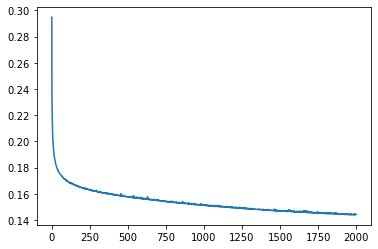

In [6]:
import matplotlib.pyplot as plt
plt.plot(loss_trace)
plt.show()

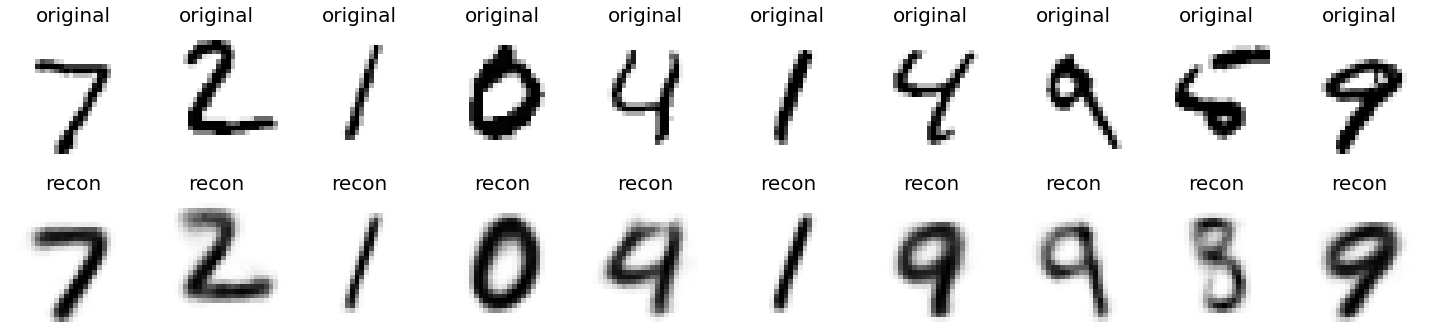

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20,5))

for i in range(2):
    for j in range(10):
        
        if i==0:
            img = x_test[j].reshape((28,28))
            title = 'original'
        else:
            img = x_test_recon[j].reshape((28,28))
            title = 'recon'
            
        axes[i, j].imshow(img, cmap='binary')
        axes[i, j].set_title(title, fontsize=20)
        axes[i, j].axis('off')
            
plt.tight_layout()

plt.show()

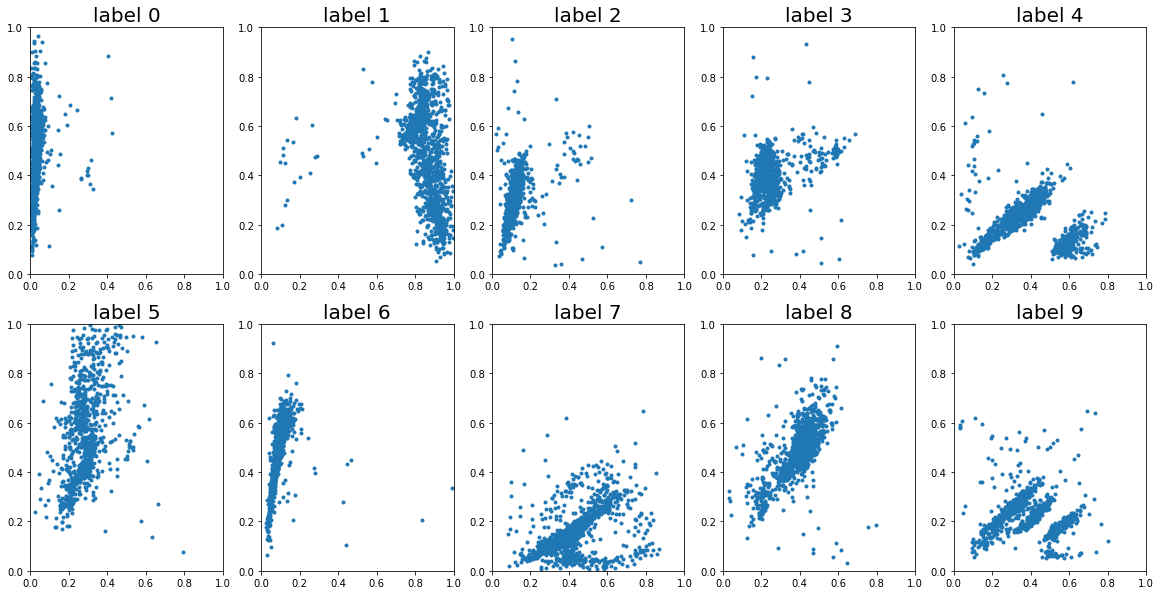

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

for i in range(2):
    for j in range(5):
        
        k = i*5 + j
    
        x_fig = x_test_hidden[y_test==k][:,0]
        y_fig = x_test_hidden[y_test==k][:,1]
        axes[i, j].plot(x_fig, y_fig, '.')
        axes[i, j].set_title(f'label {k}', fontsize=20)
        axes[i, j].set_xlim([0., 1.])
        axes[i, j].set_ylim([0., 1.])
            
plt.show()

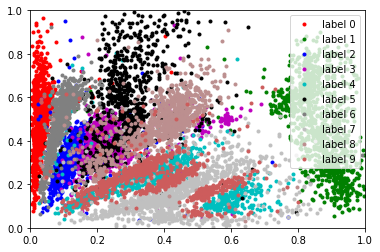

In [9]:
import matplotlib.pyplot as plt

colors = ['r','g','b','m','c','k','gray','silver','rosybrown','indianred']
for i in range(2):
    for j in range(5):
        
        k = i*5 + j
    
        x_fig = x_test_hidden[y_test==k][:,0]
        y_fig = x_test_hidden[y_test==k][:,1]
        plt.plot(x_fig, y_fig, '.', color=colors[k], label=f'label {k}')
        
plt.legend()
plt.xlim([0., 1.])
plt.ylim([0., 1.])
            
plt.show()

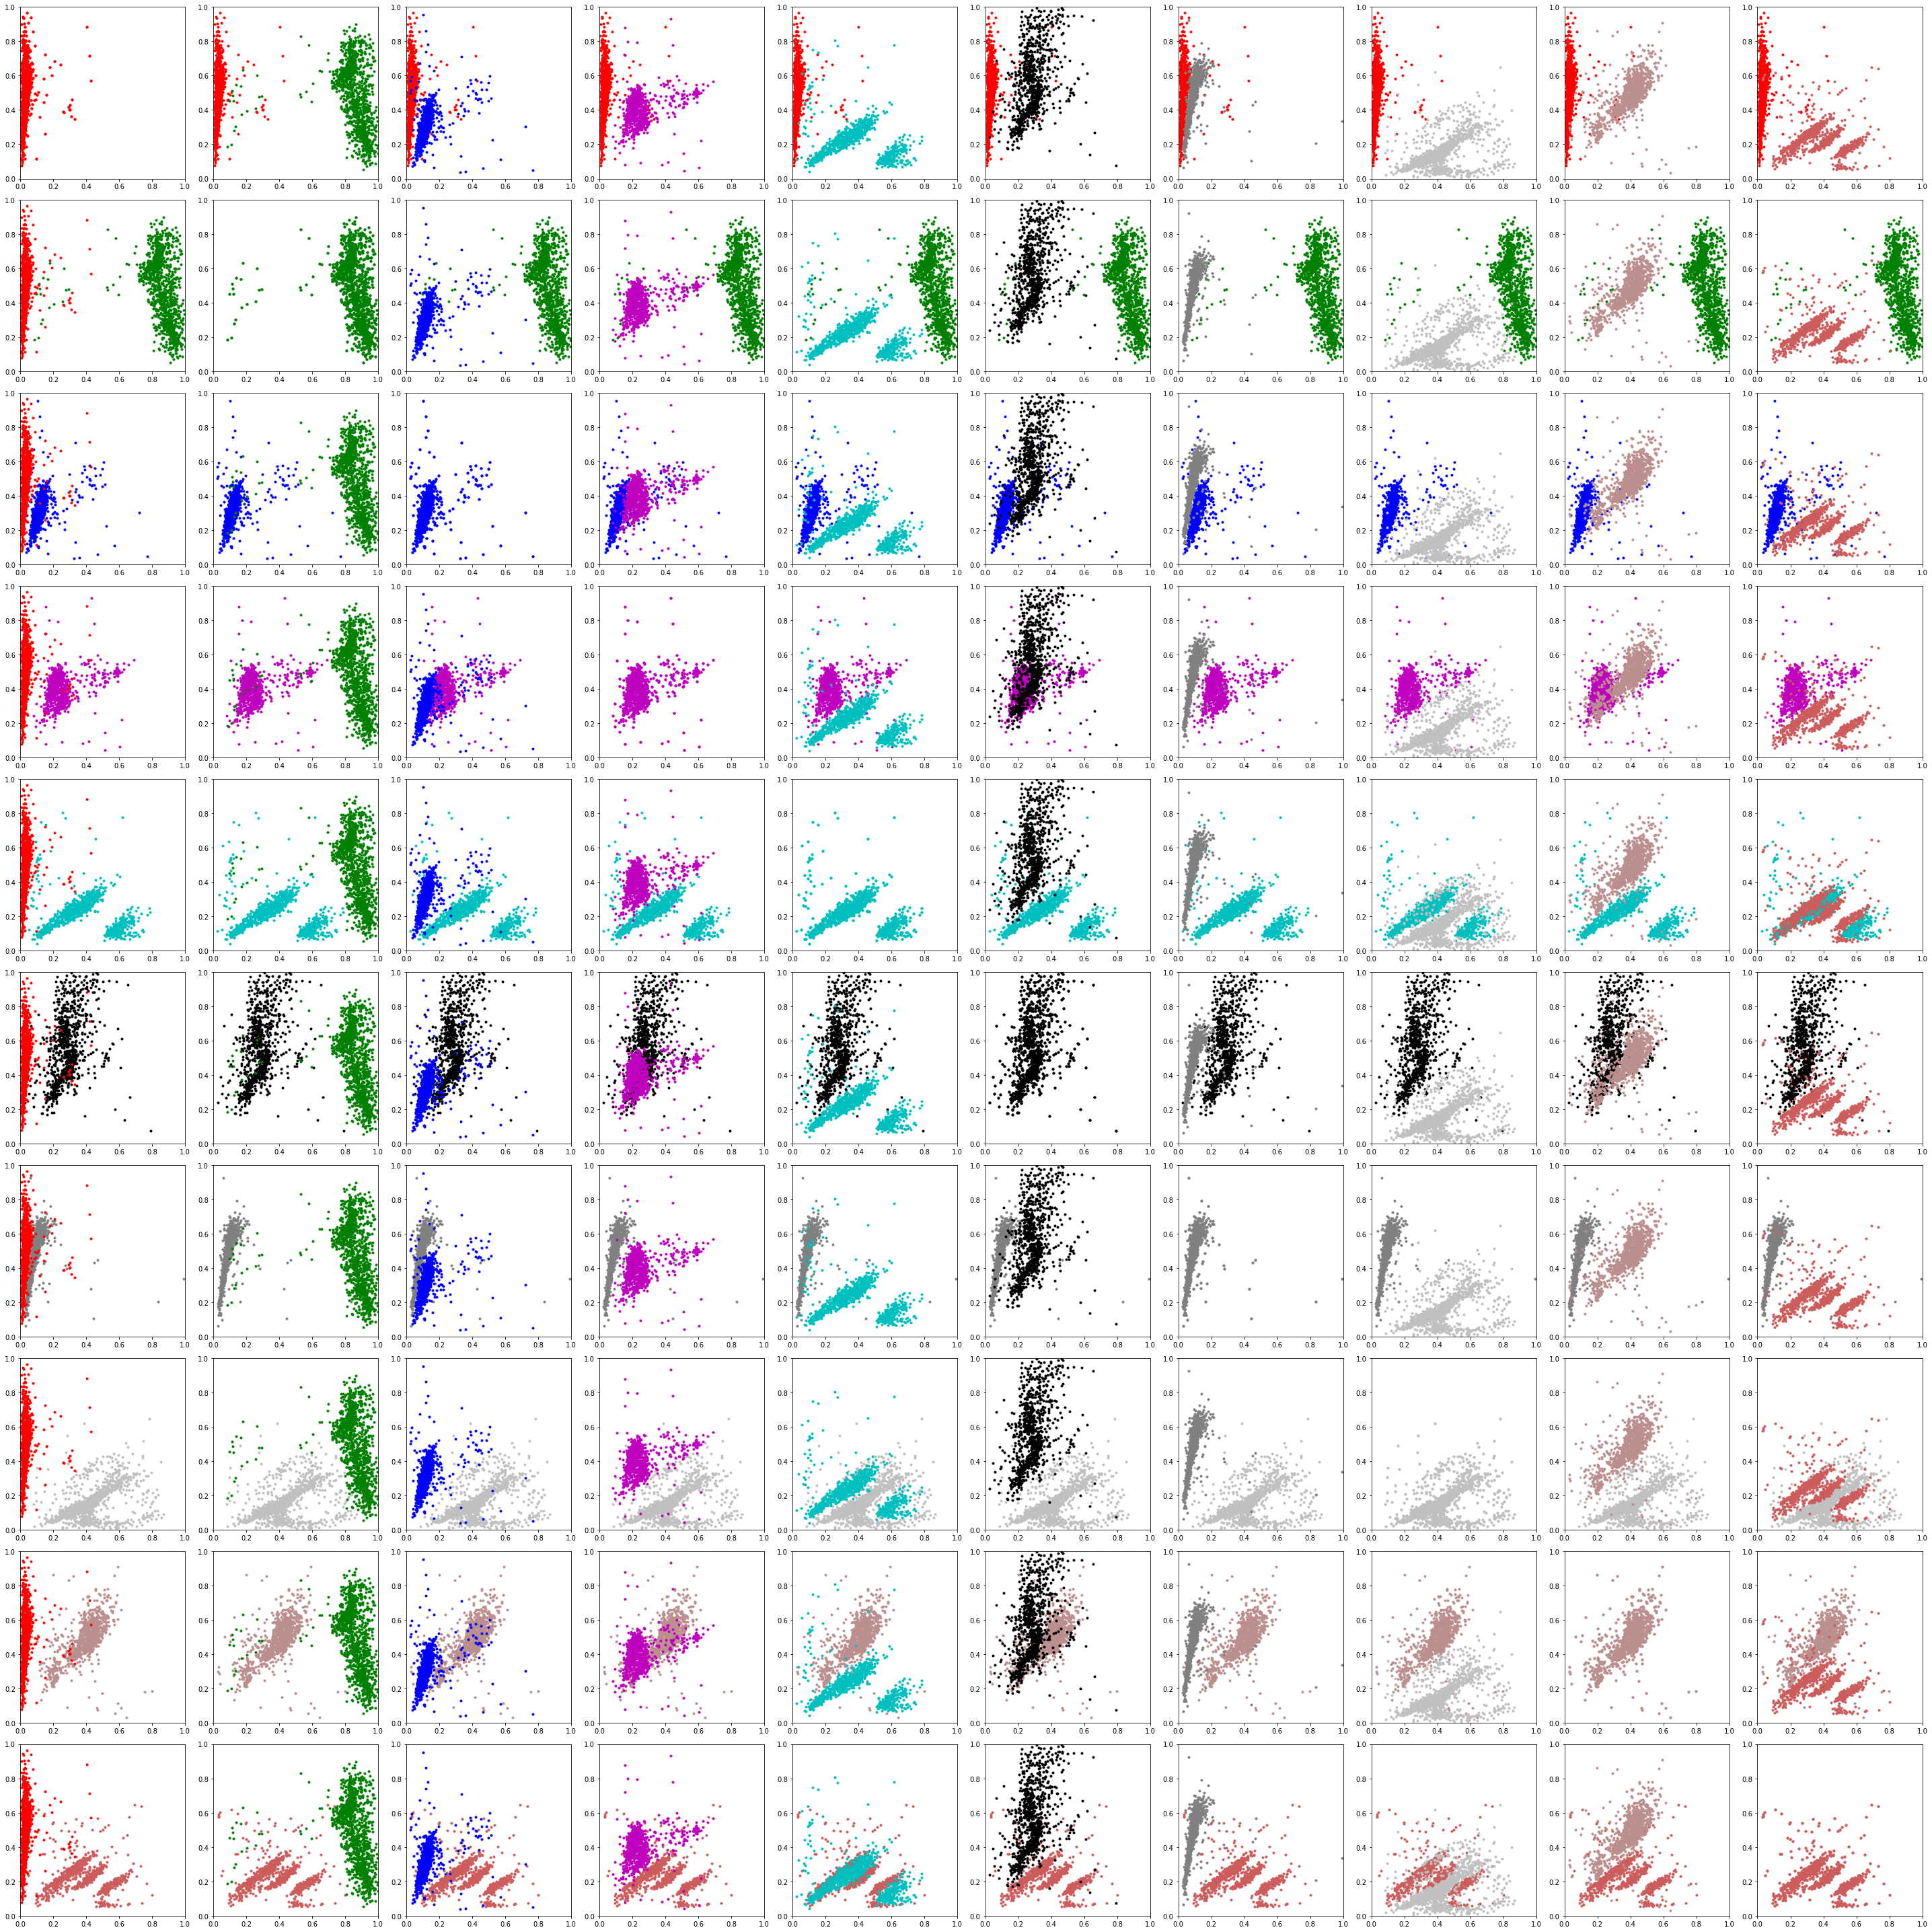

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(40,40))

colors = ['r','g','b','m','c','k','gray','silver','rosybrown','indianred']
for i in range(10):
    for j in range(10):
    
        x_fig = x_test_hidden[y_test==i][:,0]
        y_fig = x_test_hidden[y_test==i][:,1]
        axes[i, j].plot(x_fig, y_fig, '.', color=colors[i])
        
        x_fig = x_test_hidden[y_test==j][:,0]
        y_fig = x_test_hidden[y_test==j][:,1]
        axes[i, j].plot(x_fig, y_fig, '.', color=colors[j])

        axes[i, j].set_xlim([0., 1.])
        axes[i, j].set_ylim([0., 1.])

plt.tight_layout()
plt.show()

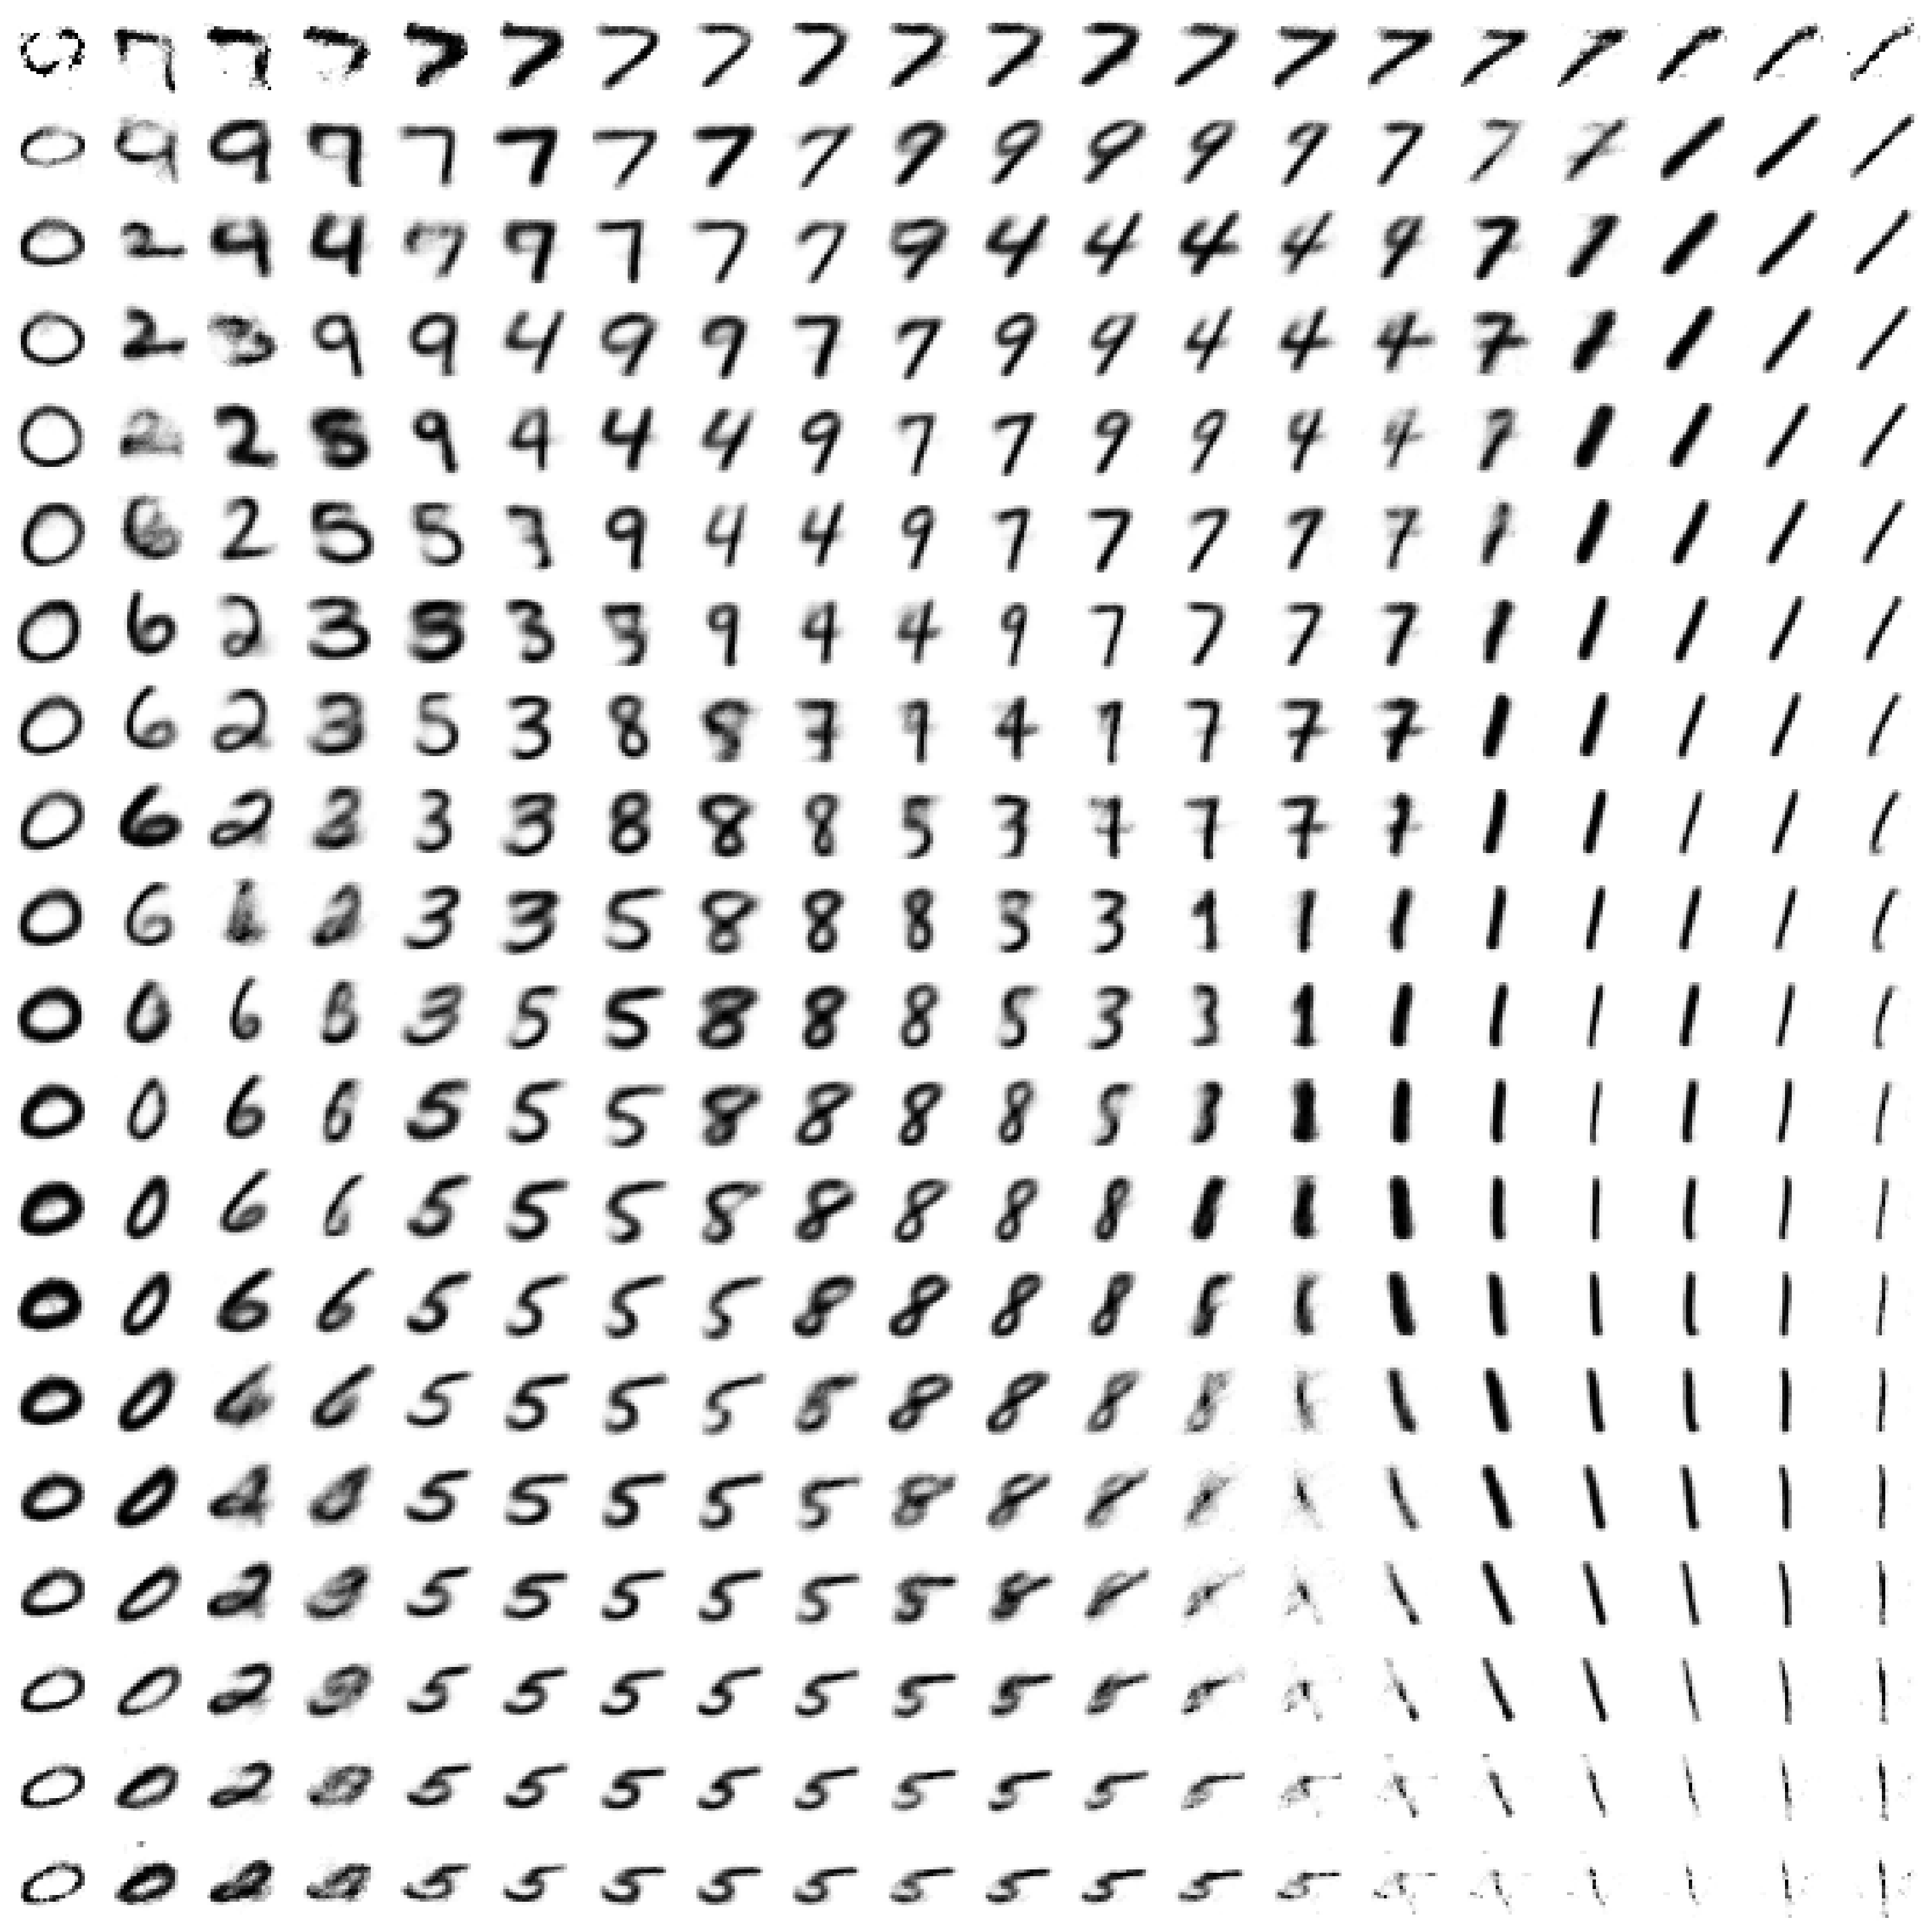

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=20, ncols=20, figsize=(40,40))

for i in range(20):
    for j in range(20):
        
        img = latent_space_walk[i*20+j].reshape((28,28))
            
        axes[i, j].imshow(img, cmap='binary')
        axes[i, j].axis('off')
            
plt.tight_layout()

plt.show()